# Patterns of Mental health 

# Demographic & Temporal factors Vs. Prevalence of Mental Health Conditions 

In [46]:
import pandas as pd

# Load the dataset
file_path = 'Mental Health Dataset.csv'
mental_health_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(mental_health_df.head())

# Display basic information about the dataset
print("\nBasic Information:")
print(mental_health_df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(mental_health_df.describe(include='all'))

First few rows of the dataset:
         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium    

In [53]:
import pandas as pd

# Load the dataset
file_path = 'Mental health Depression disorder Data.csv'
mental_health_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(mental_health_df.head())

# Display basic information about the dataset
print("\nBasic Information:")
print(mental_health_df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(mental_health_df.describe(include='all'))


C:\Users\Nabi Baksh\AppData\Local\Temp\ipykernel_2980\4161292671.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_health_df = pd.read_csv(file_path)


First few rows of the dataset:
   index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
0      0  Afghanistan  AFG  1990           0.16056             0.697779   
1      1  Afghanistan  AFG  1991          0.160312             0.697961   
2      2  Afghanistan  AFG  1992          0.160135             0.698107   
3      3  Afghanistan  AFG  1993          0.160037             0.698257   
4      4  Afghanistan  AFG  1994          0.160022             0.698469   

  Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0             0.101855               4.828830                1.677082   
1             0.099313               4.829740                1.684746   
2             0.096692               4.831108                1.694334   
3             0.094336               4.830864                1.705320   
4             0.092439               4.829423                1.716069   

   Depression (%)  Alcohol use disorders (%)  
0        4.071831               

In [54]:
# Remove rows where 'Year' is non-numeric or not relevant (e.g., BCE dates)
mental_health_df = mental_health_df[pd.to_numeric(mental_health_df['Year'], errors='coerce').notnull()]

# Convert the 'Year' column to an integer type
mental_health_df['Year'] = mental_health_df['Year'].astype(int)

# Keep only the relevant years (1800 to 2020 as an example of reasonable range)
mental_health_df = mental_health_df[(mental_health_df['Year'] >= 1800) & (mental_health_df['Year'] <= 2020)]

# Filter the dataset for the years 2010 to 2017
filtered_mental_health_df = mental_health_df[(mental_health_df['Year'] >= 2010) & (mental_health_df['Year'] <= 2017)]

# Display the first few rows of the filtered dataset
print(filtered_mental_health_df.head())


    index       Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
20     20  Afghanistan  AFG  2010           0.16513             0.705313   
21     21  Afghanistan  AFG  2011          0.165272             0.705688   
22     22  Afghanistan  AFG  2012          0.165424             0.706086   
23     23  Afghanistan  AFG  2013          0.165579             0.706471   
24     24  Afghanistan  AFG  2014          0.165742             0.706876   

   Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
20             0.097327               4.862777                2.571349   
21             0.098638               4.864773                2.573170   
22             0.099891               4.867283                2.576189   
23             0.101291               4.869701                2.572396   
24             0.103137               4.872256                2.562885   

    Depression (%)  Alcohol use disorders (%)  
20        4.130874                   0.662062  
21

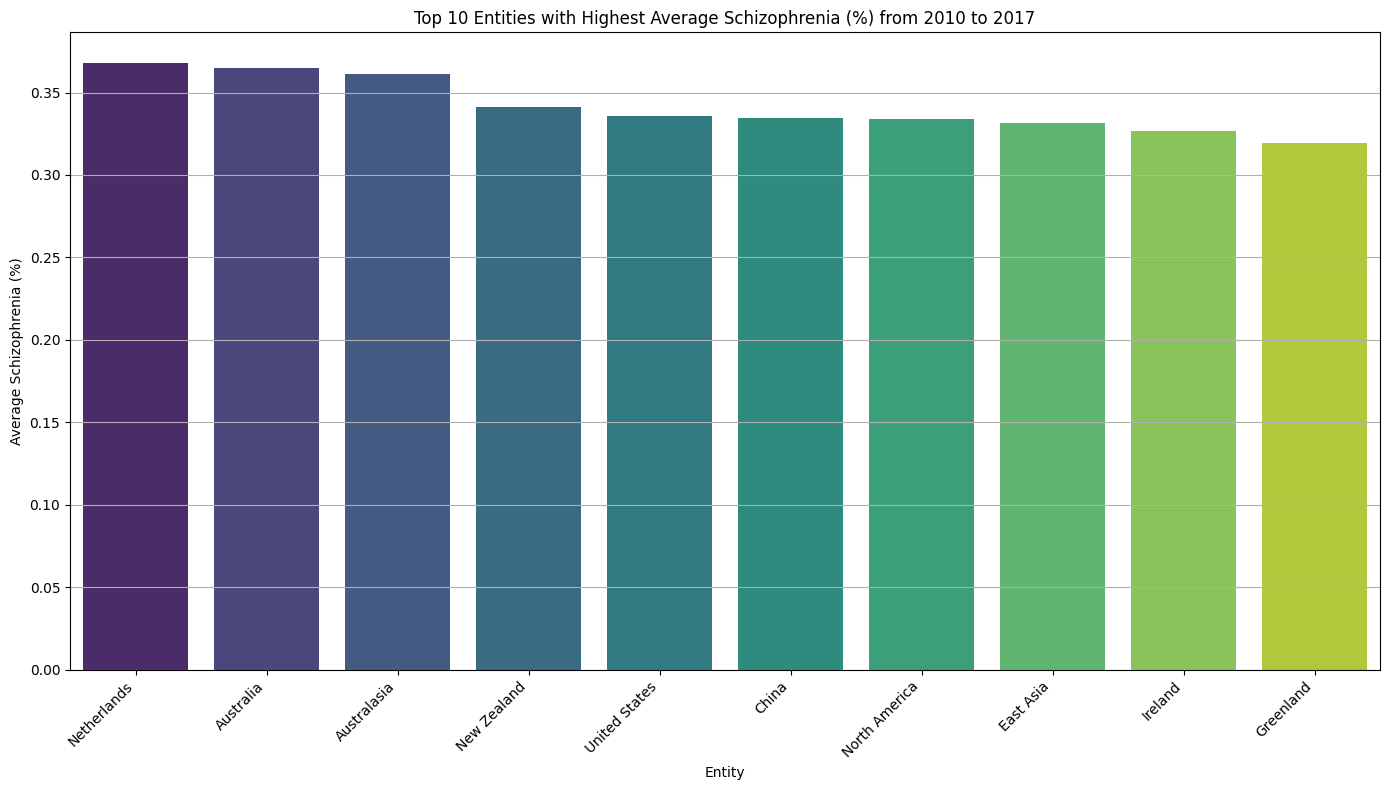

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Schizophrenia (%)' column is numeric
filtered_mental_health_df['Schizophrenia (%)'] = pd.to_numeric(filtered_mental_health_df['Schizophrenia (%)'], errors='coerce')

# Drop rows with NaN values in 'Schizophrenia (%)'
filtered_mental_health_df = filtered_mental_health_df.dropna(subset=['Schizophrenia (%)'])

# Get the top 10 entities with the highest average 'Schizophrenia (%)'
top_entities = (filtered_mental_health_df.groupby('Entity')
                .agg({'Schizophrenia (%)': 'mean'})
                .sort_values(by='Schizophrenia (%)', ascending=False)
                .head(10)
                .reset_index())

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=top_entities, x='Entity', y='Schizophrenia (%)', palette='viridis')
plt.title('Top 10 Entities with Highest Average Schizophrenia (%) from 2010 to 2017')
plt.xlabel('Entity')
plt.ylabel('Average Schizophrenia (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


C:\Users\Nabi Baksh\AppData\Local\Temp\ipykernel_2980\2187235712.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_mental_health_df, x='Year', y='Schizophrenia (%)', marker='o', color='blue', ci=None)


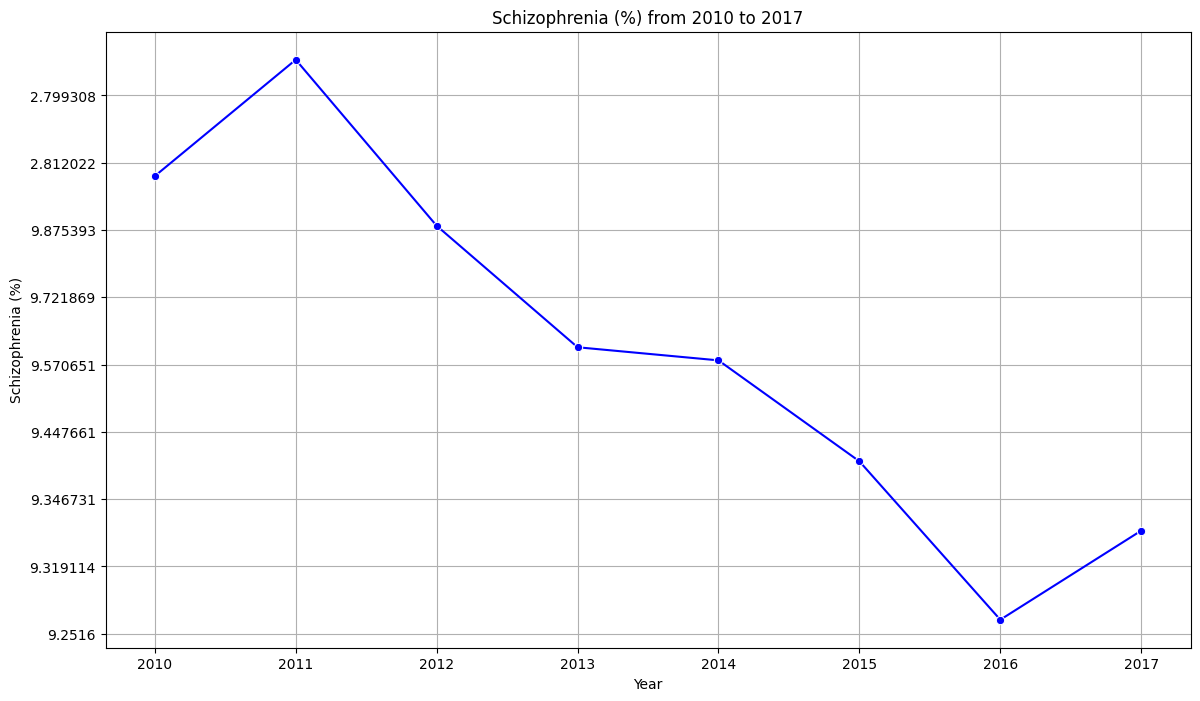

In [28]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_mental_health_df, x='Year', y='Schizophrenia (%)', marker='o', color='blue', ci=None)
plt.title('Schizophrenia (%) from 2010 to 2017')
plt.xlabel('Year')
plt.ylabel('Schizophrenia (%)')
plt.grid(True)
plt.show()


C:\Users\Nabi Baksh\AppData\Local\Temp\ipykernel_2980\1545098202.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_mental_health_df, x='Year', y='Drug use disorders (%)', marker='o', color='blue', ci=None)


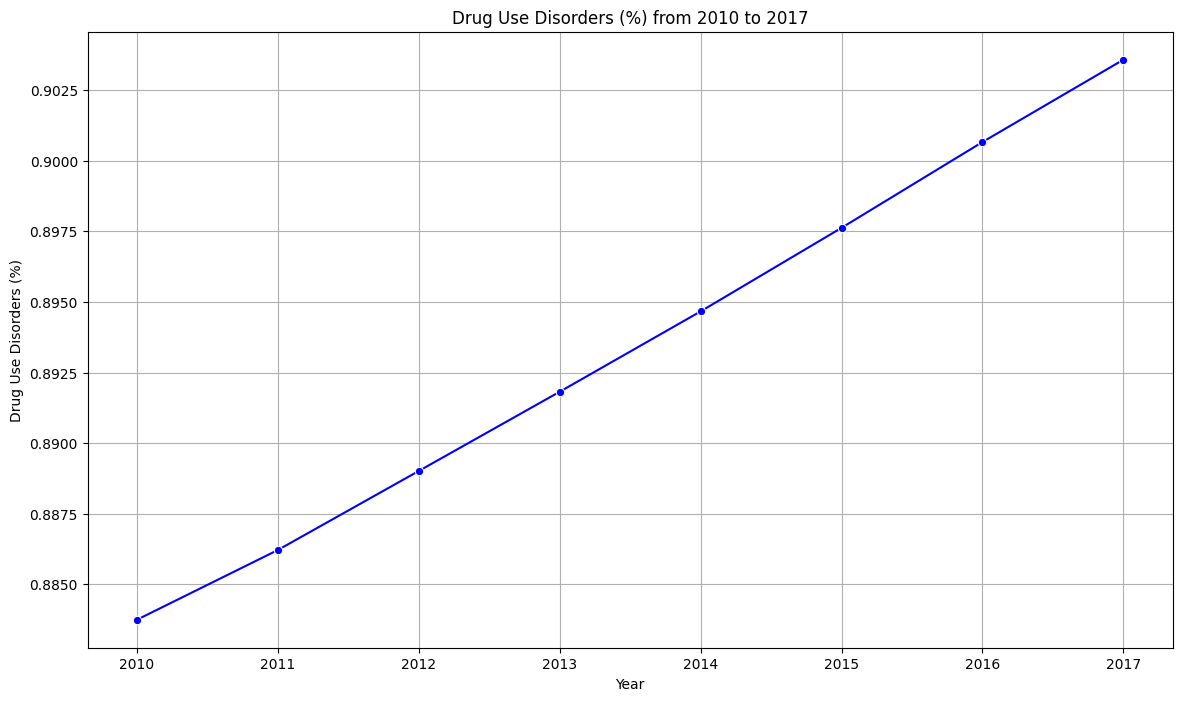

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Drug use disorders (%)' column is numeric
filtered_mental_health_df['Drug use disorders (%)'] = pd.to_numeric(filtered_mental_health_df['Drug use disorders (%)'], errors='coerce')

# Drop rows with NaN values in 'Drug use disorders (%)'
filtered_mental_health_df = filtered_mental_health_df.dropna(subset=['Drug use disorders (%)'])

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_mental_health_df, x='Year', y='Drug use disorders (%)', marker='o', color='blue', ci=None)
plt.title('Drug Use Disorders (%) from 2010 to 2017')
plt.xlabel('Year')
plt.ylabel('Drug Use Disorders (%)')
plt.grid(True)
plt.show()


In [38]:
import pandas as pd

# Load the dataset
file_path = 'Mental Health Dataset.csv'
df = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime to extract the year
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year

# Filter the dataset for the years 2010 to 2017
filtered_df = df[(df['Year'] >= 2010) & (df['Year'] <= 2017)]

# Print the first few rows of the filtered dataset
print(filtered_df.head())


            Timestamp  Gender        Country Occupation self_employed  \
0 2014-08-27 11:29:00  Female  United States  Corporate           NaN   
1 2014-08-27 11:31:00  Female  United States  Corporate           NaN   
2 2014-08-27 11:32:00  Female  United States  Corporate           NaN   
3 2014-08-27 11:37:00  Female  United States  Corporate            No   
4 2014-08-27 11:43:00  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium               No

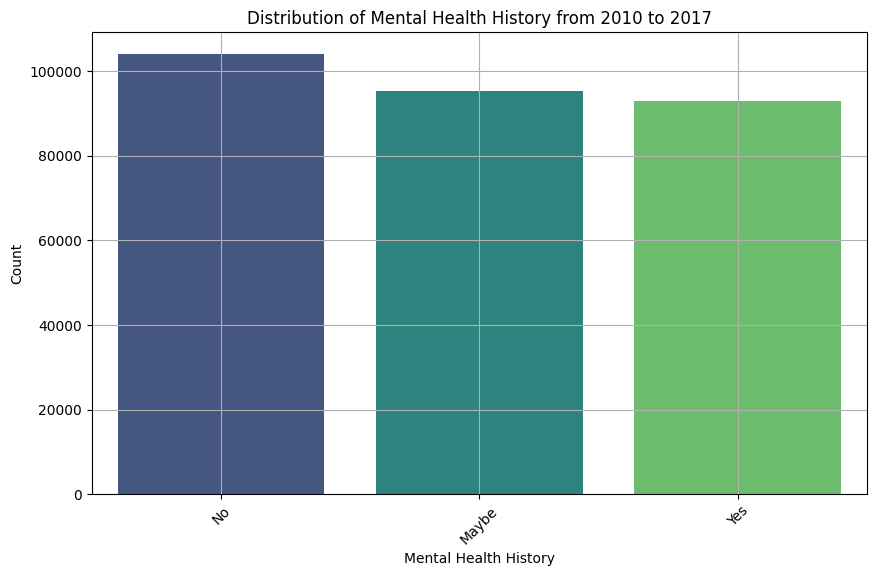

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Mental Health Dataset.csv'
df = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime to extract the year
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year

# Filter the dataset for the years 2010 to 2017
filtered_df = df[(df['Year'] >= 2010) & (df['Year'] <= 2017)]

# Count occurrences of each 'Mental_Health_History'
mental_health_counts = filtered_df['Mental_Health_History'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=mental_health_counts.index, y=mental_health_counts.values, palette='viridis')
plt.title('Distribution of Mental Health History from 2010 to 2017')
plt.xlabel('Mental Health History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


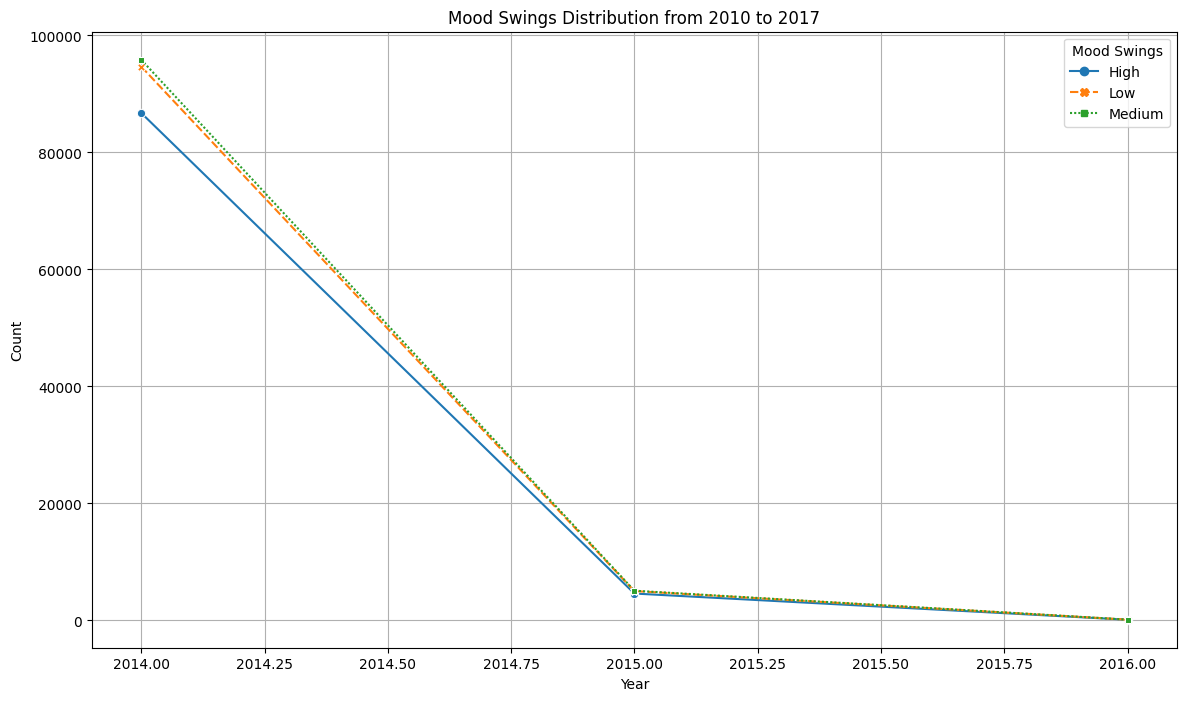

In [42]:
# Group by year and mood swings, count occurrences
mood_swings_over_time = filtered_df.groupby(['Year', 'Mood_Swings']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=mood_swings_over_time, markers=True)
plt.title('Mood Swings Distribution from 2010 to 2017')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Mood Swings')
plt.grid(True)
plt.show()


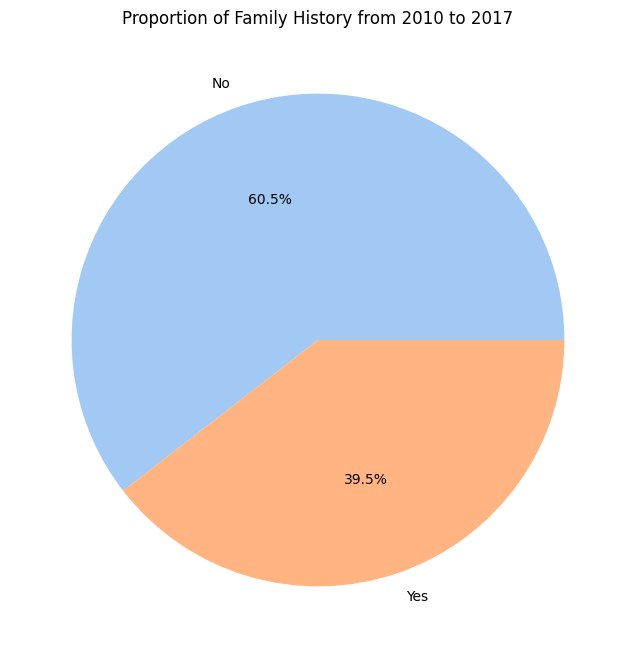

In [45]:
# Count occurrences of 'family_history'
family_history_counts = filtered_df['family_history'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Family History from 2010 to 2017')
plt.show()


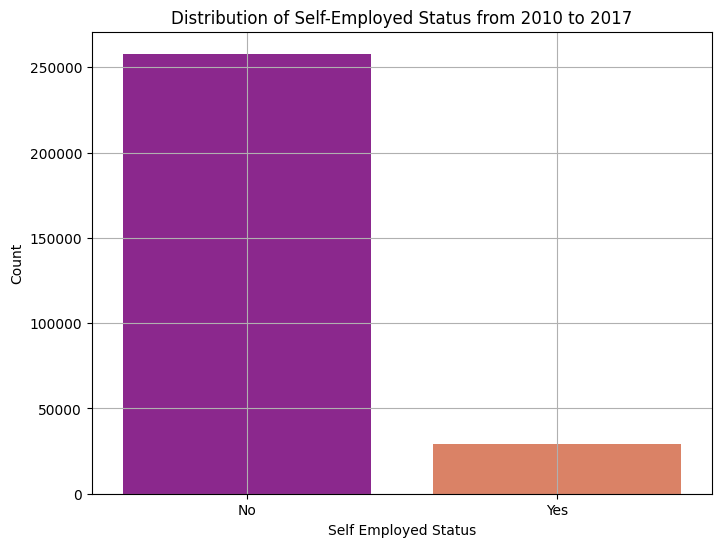

In [47]:
# Count occurrences of 'self_employed'
self_employed_counts = filtered_df['self_employed'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=self_employed_counts.index, y=self_employed_counts.values, palette='plasma')
plt.title('Distribution of Self-Employed Status from 2010 to 2017')
plt.xlabel('Self Employed Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()
